In [5]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
res = pd.read_csv("results.csv")
res

,Unnamed: 0,trial_id,iteration,test_metric,strategy,seed,score
0,0,ca15a_00000,0,0.592961,least_confidence,1,20.372791
1,1,ca15a_00000,1,0.734904,least_confidence,1,20.372791
2,2,ca15a_00000,2,0.782815,least_confidence,1,20.372791
3,3,ca15a_00000,3,0.815180,least_confidence,1,20.372791
4,4,ca15a_00000,4,0.777550,least_confidence,1,20.372791
...,...,...,...,...,...,...,...
620,620,ca15a_00024,20,0.860055,random,5,20.243162
621,621,ca15a_00024,21,0.897665,random,5,20.243162
622,622,ca15a_00024,22,0.917389,random,5,20.243162
623,623,ca15a_00024,23,0.871379,random,5,20.243162


In [21]:
res[res.strategy=="random"]

,Unnamed: 0,trial_id,iteration,test_metric,strategy,seed,score
500,500,ca15a_00020,0,0.592961,random,1,20.235377
501,501,ca15a_00020,1,0.599584,random,1,20.235377
502,502,ca15a_00020,2,0.679733,random,1,20.235377
503,503,ca15a_00020,3,0.783329,random,1,20.235377
504,504,ca15a_00020,4,0.860598,random,1,20.235377
...,...,...,...,...,...,...,...
620,620,ca15a_00024,20,0.860055,random,5,20.243162
621,621,ca15a_00024,21,0.897665,random,5,20.243162
622,622,ca15a_00024,22,0.917389,random,5,20.243162
623,623,ca15a_00024,23,0.871379,random,5,20.243162


In [39]:
aucs = res.drop_duplicates(subset=["strategy","seed"])
agg = aucs.groupby("strategy")["score"]
mean_aucs, std_aucs = agg.mean(), agg.std()
aucs = pd.concat((mean_aucs, std_aucs), axis=1)
aucs.columns = ["avg", "stdv"]
aucs["score"] = aucs.apply(lambda row: f"{row.avg:.2f} ± {row.stdv:.2f}"  ,axis=1)
label_to_auc = dict(zip(aucs.index, aucs["score"]))

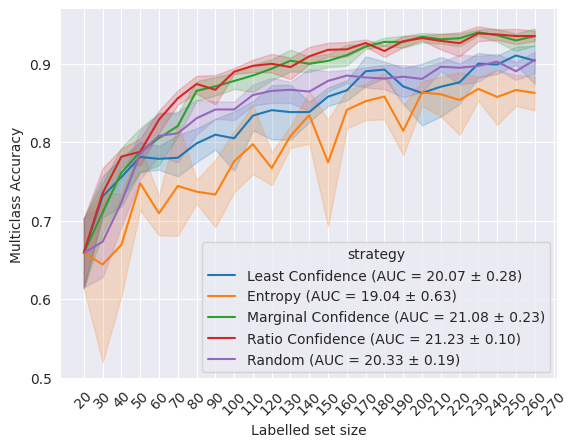

In [41]:
sns.set_style("darkgrid")

sns.lineplot(data=res, x="iteration", y="test_metric", hue="strategy")
plt.ylabel("Multiclass Accuracy")
plt.xlabel("Labelled set size")
_ = plt.xticks(np.arange(0,26), np.arange(0,26)*10 + 20, rotation=45)

ax = plt.gca()
legend = ax.get_legend()
for text in legend.get_texts():
    label = text.get_text()
    new_label = f"{label.replace('_', ' ').title()} (AUC = {label_to_auc[label]})"
    text.set_text(new_label)
    

for spine in ax.spines.values():
    spine.set_visible(False)